In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
data = pd.read_csv('data_power.csv')

In [0]:
dataset = data['output'].replace(to_replace = ['h','in','ou','brb1','brb3'],value = [2,3,4,0,1])
Y_GRP= dataset.values
Y_TR = Y_GRP[:100]
Y_TS = Y_GRP[100:]


In [0]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [0]:
# multi-class classification with Keras

# load dataset
#dataframe = pandas.read_csv("iris.data", header=None)
dataset = data.values
X = dataset[:,0:11].astype(float)
Y = dataset[:,11]

In [0]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [0]:
x_train = X[:100,:]
x_test = X[100:,:]
y_train = dummy_y[:100,:]
y_test = dummy_y[100:,:]
x_train = x_train.reshape(100,11,1)
x_test = x_test.reshape(100,11,1)
#y_train = y_train.reshape(100,5,1)
#y_test = y_test.reshape(100,5,1)

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(100, 11, 1)
(100, 11, 1)
(100, 5)
(100, 5)


In [0]:
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical

In [0]:
n_steps,n_features = 11,1
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(150, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))

model.add(Dense(50, activation='sigmoid'))

model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:

history = model.fit(x_train, y_train, epochs=350, verbose=1,batch_size=5, validation_data=(x_test, y_test))


Train on 100 samples, validate on 100 samples
Epoch 1/350
100/100 [==============================] - 1s 11ms/step - loss: 1.6788 - acc: 0.1500 - val_loss: 1.6134 - val_acc: 0.2000
Epoch 2/350
100/100 [==============================] - 0s 2ms/step - loss: 1.6182 - acc: 0.1900 - val_loss: 1.6089 - val_acc: 0.2300
Epoch 3/350
100/100 [==============================] - 0s 2ms/step - loss: 1.6218 - acc: 0.2100 - val_loss: 1.6079 - val_acc: 0.2000
Epoch 4/350
100/100 [==============================] - 0s 2ms/step - loss: 1.6197 - acc: 0.1800 - val_loss: 1.6067 - val_acc: 0.2600
Epoch 5/350
100/100 [==============================] - 0s 2ms/step - loss: 1.6158 - acc: 0.2000 - val_loss: 1.6024 - val_acc: 0.2000
Epoch 6/350
100/100 [==============================] - 0s 2ms/step - loss: 1.6164 - acc: 0.2000 - val_loss: 1.6000 - val_acc: 0.2000
Epoch 7/350
100/100 [==============================] - 0s 2ms/step - loss: 1.6165 - acc: 0.1900 - val_loss: 1.5947 - val_acc: 0.2700
Epoch 8/350
100/100 [=

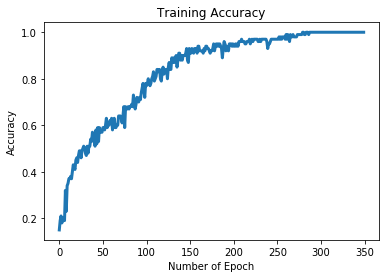

In [0]:
#Accracy 
plt.plot(history.history['acc'],linewidth = 3)
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epoch')
plt.show()

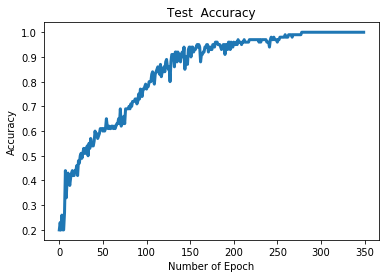

In [0]:
plt.plot(history.history['val_acc'],linewidth = 3)
plt.title('Test  Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epoch')
plt.show()

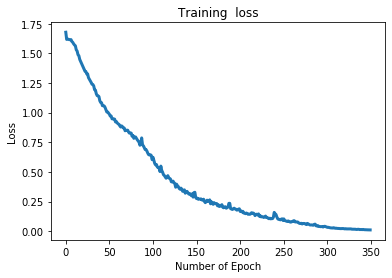

In [0]:
#Plot_loss
plt.plot(history.history['loss'],linewidth = 3)
plt.title('Training  loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epoch')
plt.show()

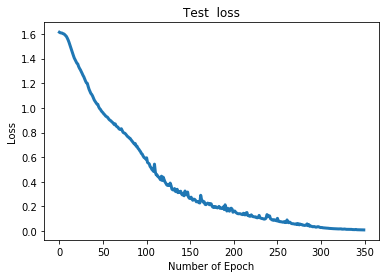

In [0]:
plt.plot(history.history['val_loss'],linewidth = 3)
plt.title('Test  loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epoch')
plt.show()

In [0]:

y_test_pred = model.predict_classes(x_test)

In [0]:
y_train_pred = model.predict_classes(x_train)

In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix,accuracy_score,classification_report,average_precision_score,recall_score,f1_score




In [0]:
print(classification_report(Y_TS,y_test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [0]:
print("accuracy_score : {}".format(accuracy_score(Y_TS,y_test_pred)))





accuracy_score : 1.0


In [0]:
cm = confusion_matrix(Y_TS,y_test_pred)


[[20  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  0 20  0]
 [ 0  0  0  0 20]]


In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization


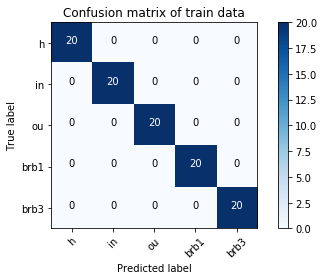

In [0]:

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['h', 'in', 'ou','brb1','brb3'],title='Confusion matrix of train data')

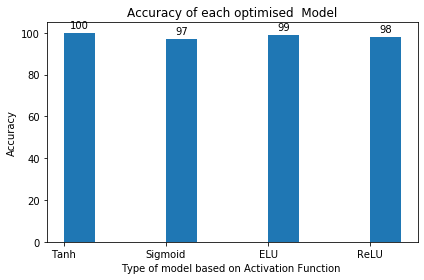

In [0]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Tanh', 'Sigmoid', 'ELU', 'ReLU']
#Train_Accuracy = [96, 99, 100, 100, 100,100,100]
Test_Acc = [100, 97,99, 98]


x = np.arange(len(labels))  # the label locations
width = 0.3 # the width of the bars

fig, ax = plt.subplots()
#rects1 = ax.bar(x - width/2, Train_Accuracy, width, label='Train Accuracy')
rects2 = ax.bar(x + width/2,Test_Acc, width, label='Test_Acc')
 

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Type of model based on Activation Function ')
ax.set_title('Accuracy of each optimised  Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


#autolabel(rects1)
autolabel(rects2)


fig.tight_layout()

plt.show()